# Zeros de Funções Reais em Octave

## Método da Bissecção

In [1]:
function y = f(x)

y = cot(x) - (x.^2 - 1)./(2.*x);
end

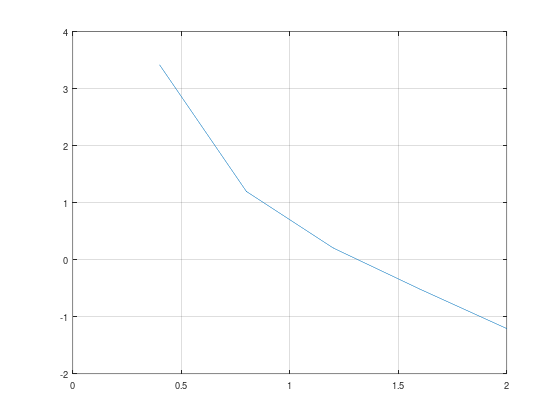

In [2]:
x = linspace(0,2,6);
plot(x,f(x))
grid

In [3]:
function [xt,xt_seq] = MetodoBisseccao(f,a,b)
    % Usar a função f definida anteriormente;
    % Intervalo [a,b]
    delta = 1.e-5;
    epsilon = 1.e-5
    % Inicialização
    fa = f(a);
    fb = f(b);
    it = 0;
    while (b-a)>2*delta
        it = it+1;
        m = (a+b)/2;
        xt_seq(it) = m;
        fm = f(m);
        if abs(fm)<epsilon
            xt = m;
            disp("Sortudo: Você encontrou a raiz!")
        return
        end
        if fa*fm<0
            b = m;
            fb = fm;
        else
            a = m;
            fa = fm;
        end
    end
    disp("Numero de iterações:")
    it
    disp("A raiz esta no intervalo:")
    a,b
    disp("A aproximação para a raiz é:")
    xt = (a+b)/2;
endfunction

In [4]:
[xt1,xt_seq1] = MetodoBisseccao(@f,1,2);
xt1
f(xt1)

epsilon = 1.0000e-05
Numero de iterações:
it = 16
A raiz esta no intervalo:
a = 1.3065
b = 1.3065
A aproximação para a raiz é:
xt1 = 1.3065
ans = 1.7379e-06


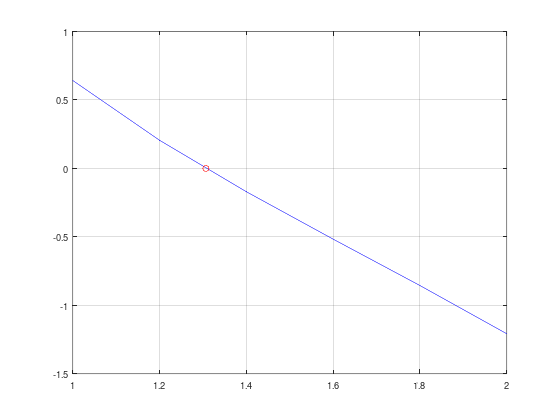

In [5]:
x = linspace(1,2,6);
plot(x,f(x),'-b',xt1,f(xt1),'or')
grid

## Método da Posição Falsa

In [6]:
function [xt,xt_seq] = MetodoPosicaoFalsa(f,a,b)
    % Usar a função f definida anteriormente;
    % Intervalo [a,b]
    delta = 1.e-5;
    epsilon = 1.e-5
    % Inicialização
    fa = f(a);
    fb = f(b);
    it = 0;
    while (b-a)>2*delta
        it = it+1;
        #m = (a+b)/2;
        m = a - ((b-a)/(fb-fa))*fa;
        xt_seq(it) = m;
        fm = f(m);
        if abs(fm)<epsilon
            xt = m;
            disp("Sortudo: Você encontrou a raiz!")
            disp("Numero de iterações:")
            it
            return
        end
        if fa*fm<0
            b = m;
            fb = fm;
        else
            a = m;
            fa = fm;
        end
    end
    disp("Numero de iterações:")
    it
    disp("A raiz esta no intervalo:")
    a,b
    disp("A aproximação para a raiz é:")
    xt = (a+b)/2;
endfunction

In [7]:
[xt2,xt_seq2] = MetodoPosicaoFalsa(@f,1,2);
xt2
f(xt2)

epsilon = 1.0000e-05
Sortudo: Você encontrou a raiz!
Numero de iterações:
it = 6
xt2 = 1.3065
ans = -1.1356e-06


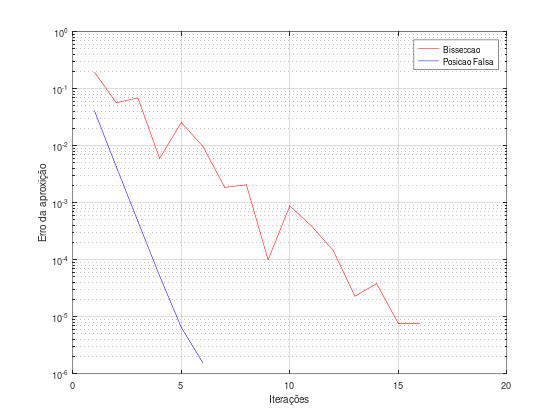

In [8]:
semilogy(abs(xt_seq1-xt1),'-r',abs(xt_seq2-xt1),'-b')
xlabel("Iterações")
ylabel("Erro da aproxição")
legend("Bisseccao","Posicao Falsa")
grid

## Metodo Ponto Fixo

In [9]:
function y=phi(x)
    y = sqrt(2.*x.*cot(x) + 1);
end

In [10]:
function [xt, xseq] = MetodoPontoFixo(phi,x0)
    % Parametros;
    delta = 1.e-5;
    kmax = 100;
    xseq = [x0];
    k = 0;
    Er = delta+1;
    while (Er>delta) && (k<kmax)
        k = k+1;
        xseq(k+1) = phi(xseq(k));
        Er = abs(xseq(k+1)-xseq(k));
    end
    xt = xseq(end);
endfunction

xt3 = 1.3065
ans = 8.0465e-06
    __plt__>__plt2vv__ at line 502 column 10
    __plt__>__plt2__ at line 248 column 14
    __plt__>__plt1__ at line 207 column 10
    __plt__ at line 121 column 16
    semilogy at line 65 column 10



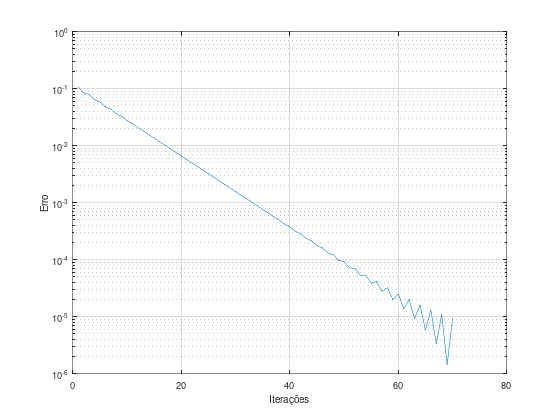

In [11]:
[xt3, xseq3] = MetodoPontoFixo(@phi,1.2);
xt3
f(xt3)
semilogy(abs(xseq3-xt3))
xlabel("Iterações")
ylabel("Erro")
grid

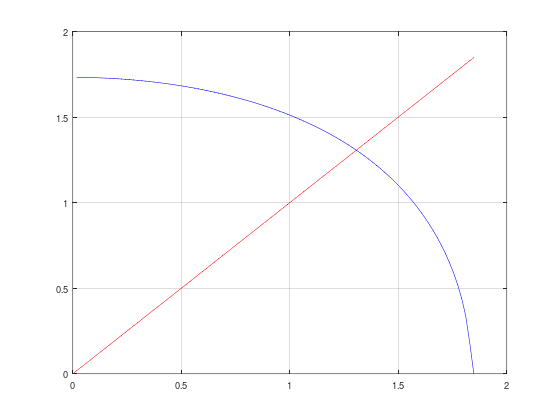

In [12]:
t = linspace(0,pi/1.7);
plot(t,t,'-r',t,phi(t),'-b')
grid

In [13]:
xseq3-xt3

ans =

 Columns 1 through 8:

  -0.1065   0.0838  -0.0788   0.0635  -0.0585   0.0480  -0.0436   0.0363

 Columns 9 through 16:

  -0.0325   0.0273  -0.0243   0.0206  -0.0182   0.0155  -0.0136   0.0116

 Columns 17 through 24:

  -0.0102   0.0087  -0.0076   0.0066  -0.0057   0.0049  -0.0043   0.0037

 Columns 25 through 32:

  -0.0032   0.0028  -0.0024   0.0021  -0.0018   0.0016  -0.0014   0.0012

 Columns 33 through 40:

  -0.0010   0.0009  -0.0008   0.0007  -0.0006   0.0005  -0.0004   0.0004

 Columns 41 through 48:

  -0.0003   0.0003  -0.0002   0.0002  -0.0002   0.0002  -0.0001   0.0001

 Columns 49 through 56:

  -0.0001   0.0001  -0.0001   0.0001  -0.0001   0.0001  -0.0000   0.0000

 Columns 57 through 64:

  -0.0000   0.0000  -0.0000   0.0000  -0.0000   0.0000  -0.0000   0.0000

 Columns 65 through 71:

  -0.0000   0.0000  -0.0000   0.0000  -0.0000   0.0000        0



## Método de Newton

In [14]:
function [xt, xseq] = MetodoNewton(f,df,x0)
    % Parametros;
    delta = 1.e-5;
    epsilon = 1.e-5
    kmax = 100;
    xseq = [x0];
    k = 0;
    Er = delta+1;
    while (Er>delta) && (k<kmax) && (abs(f(xseq(end)))>epsilon)
        k = k+1;
        xseq(k+1) = xseq(k)-f(xseq(k))/df(xseq(k));
        Er = abs(xseq(k+1)-xseq(k));
    end
    xt = xseq(end);
endfunction

In [15]:
function y = df(x)
    y = -csc(x).^2-(x.^2+1)./(2.*x.^2);
end

In [16]:
[xtd, xseqd] = MetodoNewton(@f,@df,1.2);
xtd
f(xtd)
xseqd

epsilon = 1.0000e-05
xtd = 1.3065
ans = 7.2292e-06
xseqd =

   1.2000   1.3028   1.3065



## Método Secante

In [17]:
function [xt, xseq] = MetodoSecante(f,x0,x1)
    % Parametros;
    delta = 1.e-5;
    epsilon = 1.e-5;
    kmax = 100;
    xseq = [x0,x1];
    k = 1;
    Er = delta+1;
    while (Er>delta) && (k<kmax) && (abs(f(xseq(end)))>epsilon)
        k = k+1;
        m = (f(xseq(k))-f(xseq(k-1)))/(xseq(k)-xseq(k-1));
        xseq(k+1) = xseq(k)-f(xseq(k))/m;
        Er = abs(xseq(k+1)-xseq(k));
    end
    xt = xseq(end);
endfunction

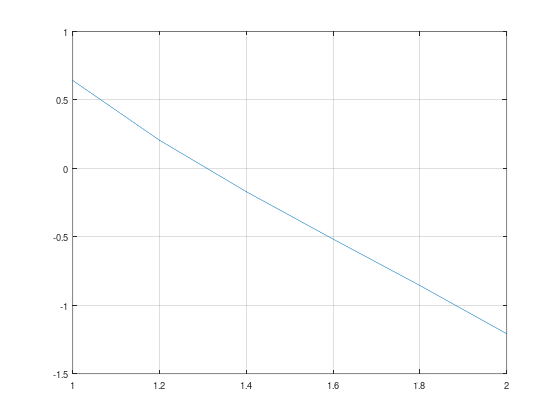

In [18]:
t = linspace(1,2,6);
plot(t,f(t));
grid

In [19]:
[xt6, xseq6] = MetodoSecante(@f,1.2,1.4);
xt6
f(xt6)
xseq6'

xt6 = 1.3065
ans = -9.3929e-08
ans =

   1.2000
   1.4000
   1.3093
   1.3065
   1.3065

